In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

In [2]:
filepath="/content/drive/MyDrive/Data Science/data/Class-2/Total_Beneficiery_Registered_for_Wellness_Center_Different_City.csv"
data=pd.read_csv(filepath)
print(data)

           cityName     wellnessCentreName        card_type  count
0          AGARTALA               AGARTALA        Pensioner    462
1          AGARTALA               AGARTALA          Serving  12705
2          AGARTALA               AGARTALA  Freedom Fighter      4
3              AGRA                   AGRA        Pensioner    860
4              AGRA                   AGRA          Serving   4380
...             ...                    ...              ...    ...
1217  VISAKHAPATNAM  VISAKHAPATNAM WC NO 2          Serving   4112
1218  VISAKHAPATNAM  VISAKHAPATNAM WC NO 2        Pensioner   6372
1219  VISAKHAPATNAM          VISAKHAPATNAM  Freedom Fighter      4
1220  VISAKHAPATNAM          VISAKHAPATNAM        Pensioner   9862
1221  VISAKHAPATNAM          VISAKHAPATNAM          Serving   5901

[1222 rows x 4 columns]


# Visualizing Amounts

1. Bar Plot
2. Staked Bar Plot
3. Scatter Plot

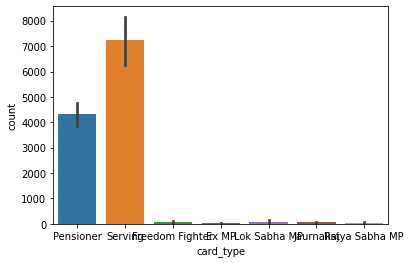

In [3]:
ax = sns.barplot(x="card_type",y="count", data=data)

In [6]:
data_beneficiery=data.groupby("card_type").sum()
#data_beneficiery["card_type"]=data_beneficiery.index
data_beneficiery.reset_index(level=0, inplace=True)
print(data_beneficiery)

         card_type    count
0            Ex MP     4329
1  Freedom Fighter    11771
2       Jaurnalist     5251
3     Lok Sabha MP     1684
4        Pensioner  1473428
5   Rajya Sabha MP      648
6          Serving  2485897


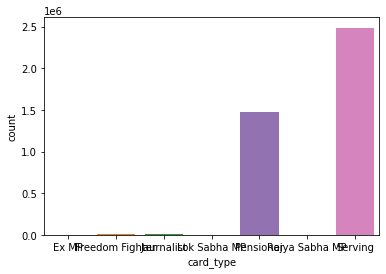

In [7]:
ax = sns.barplot(x="card_type",y="count", data=data_beneficiery)

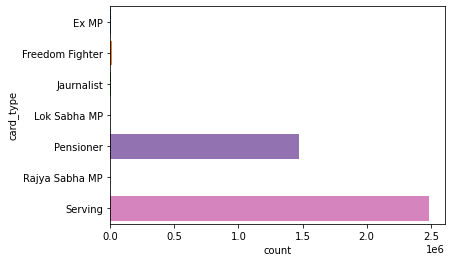

In [ ]:
ax = sns.barplot(x="count",y="card_type", data=data_beneficiery)

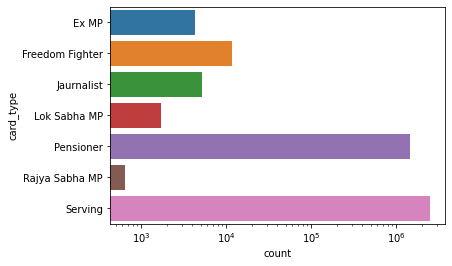

In [10]:
ax = sns.barplot(x="count",y="card_type", data=data_beneficiery)
ax.set_xscale("log")

Text(0.5, 0, 'Count')

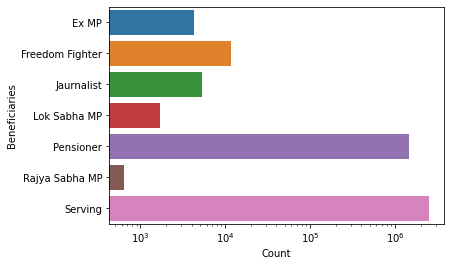

In [11]:
ax = sns.barplot(x="count",y="card_type", data=data_beneficiery)
ax.set_xscale("log")
ax.set_ylabel("Beneficiaries")#,rotation=90)
ax.set_xlabel("Count")

          cityName        card_type    count
5        AHMEDABAD            Ex MP      109
6        AHMEDABAD  Freedom Fighter       37
7        AHMEDABAD     Lok Sabha MP        2
8        AHMEDABAD        Pensioner    24785
9        AHMEDABAD          Serving    49855
62   DELHI AND NCR            Ex MP     2534
63   DELHI AND NCR  Freedom Fighter      270
64   DELHI AND NCR       Jaurnalist     5250
65   DELHI AND NCR     Lok Sabha MP     1647
66   DELHI AND NCR        Pensioner   485216
67   DELHI AND NCR   Rajya Sabha MP      635
68   DELHI AND NCR          Serving  1351274
133        KOLKATA            Ex MP      162
134        KOLKATA  Freedom Fighter     1968
135        KOLKATA        Pensioner   104854
136        KOLKATA          Serving    75626
154         MUMBAI            Ex MP       79
155         MUMBAI  Freedom Fighter       72
156         MUMBAI        Pensioner    76551
157         MUMBAI          Serving   126705


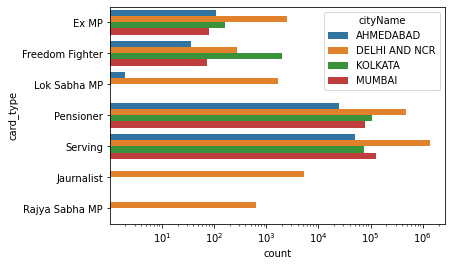

In [19]:
beneficiary_data=data.groupby(["cityName","card_type"]).agg(count=("count", 'sum'))
beneficiary_data=beneficiary_data.reset_index()
#print(beneficiary_data)

idx=beneficiary_data["cityName"].isin(["AHMEDABAD","DELHI AND NCR",'MUMBAI','KOLKATA'])
beneficiary_data=beneficiary_data[idx]
print(beneficiary_data)


# plot barplot
ax=sns.barplot(x="count",
           y="card_type",
           hue="cityName",
           data=beneficiary_data)

ax.set_xscale("log")


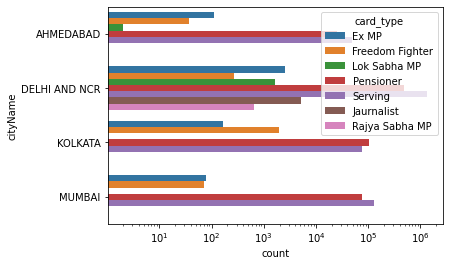

In [20]:
ax=sns.barplot(x="count",
           y="cityName",
           hue="card_type",
           data=beneficiary_data)

ax.set_xscale("log")

In [25]:
beneficiary_data=data.pivot_table("count",index="cityName",columns="card_type",aggfunc='sum')
beneficiary_data=beneficiary_data.fillna(0)
beneficiary_data=beneficiary_data.astype(int)

#beneficiary_data=beneficiary_data.T

beneficiary_data=beneficiary_data.T[["AHMEDABAD","DELHI AND NCR",'MUMBAI','KOLKATA']]

print(beneficiary_data)


cityName         AHMEDABAD  DELHI AND NCR  MUMBAI  KOLKATA
card_type                                                 
Ex MP                  109           2534      79      162
Freedom Fighter         37            270      72     1968
Jaurnalist               0           5250       0        0
Lok Sabha MP             2           1647       0        0
Pensioner            24785         485216   76551   104854
Rajya Sabha MP           0            635       0        0
Serving              49855        1351274  126705    75626


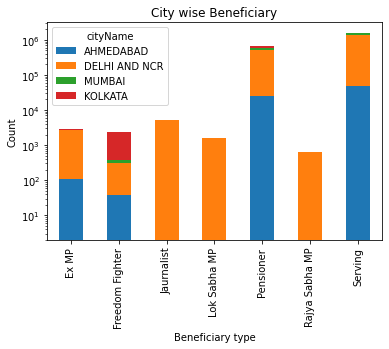

In [28]:
beneficiary_data.plot(kind='bar', stacked=True)
# labels for x & y axis
plt.xlabel('Beneficiary type')
plt.ylabel('Count')
  
# title of plot
plt.title('City wise Beneficiary')
plt.yscale('log')

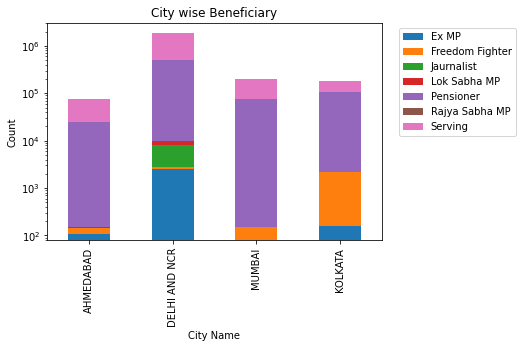

In [33]:
beneficiary_data.T.plot(kind='bar', stacked=True)
# labels for x & y axis
plt.xlabel('City Name')
plt.ylabel('Count')
  
# title of plot
plt.title('City wise Beneficiary')
plt.yscale('log')
plt.legend( loc='upper left')
plt.legend(loc=(1.05,0.48))

In [34]:
beneficiary_data=data.groupby(["cityName"]).agg(count=("count", 'sum'))
beneficiary_data=beneficiary_data.reset_index()
beneficiary_data=beneficiary_data.iloc[0:20]
print(beneficiary_data)

        cityName   count
0       AGARTALA   13171
1           AGRA    5240
2      AHMEDABAD   74788
3        AIZAWAL    4653
4          AJMER    4910
5        ALIGARH    1737
6         AMBALA    7857
7       AMRITSAR    7723
8        BAGHPAT     478
9       BAREILLY    5527
10     BENGALURU  136866
11     BERHAMPUR    1294
12        BHOPAL   23885
13  BHUBANESHWAR   27934
14       CALICUT    2044
15    CHANDIGARH   41541
16       CHENNAI  131642
17       CHHAPRA     335
18       CUTTACK    3550
19     DARBHANGA     576


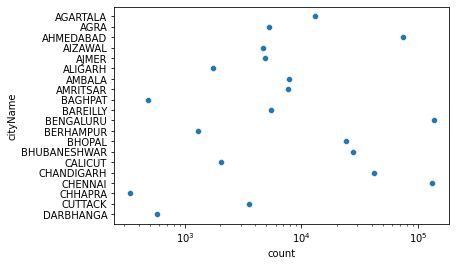

In [37]:
ax=sns.scatterplot(data=beneficiary_data, x="count", y="cityName")
ax.set_xscale("log")

# Visualizing Distribution

1. Histogram
2. Cumulative Distribution
3. Kernal Distribution Function (KDE)
4. Q-Q Plot

Explore Histrogram at
https://seaborn.pydata.org/generated/seaborn.histplot.html

In [39]:
# Student Performace Data
# https://www.kaggle.com/spscientist/students-performance-in-exams
filepath="/content/drive/MyDrive/Data Science/data/Class-2/StudentsPerformance.csv"
data=pd.read_csv(filepath)
print(data)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

In [40]:
data["average marks"]=data[["math score","reading score","writing score"]].mean(axis=1)
print(data)
#sns.histplot(data=data, x="average marks")

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  \
0                      none          72             72        

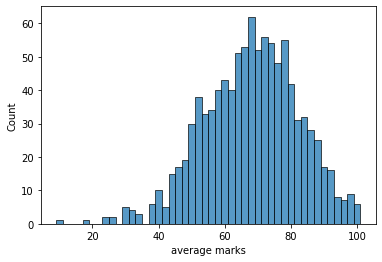

In [41]:
sns.histplot(data=data, x="average marks",binwidth=2)

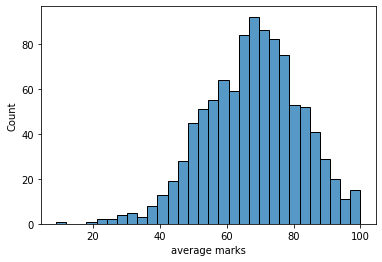

In [42]:
sns.histplot(data=data, x="average marks",bins=30)

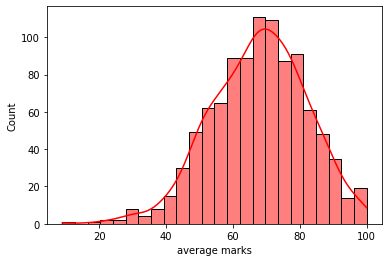

In [ ]:
sns.histplot(data=data, x="average marks",kde=True,color="r")

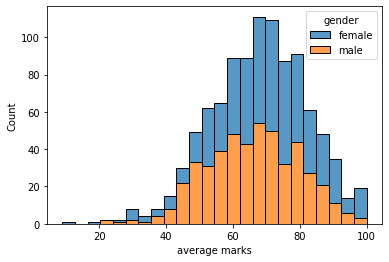

In [46]:
sns.genderhistplot(data=data, x="average marks",hue="gender",multiple="stack")

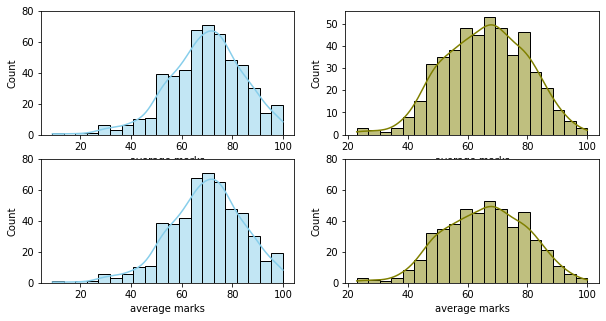

In [50]:
female_data=data[data["gender"]=="female"]
male_data=data[data["gender"]=="male"]
#print(male_data)

fig, axs = plt.subplots(2, 2, figsize=(10, 5))

sns.histplot(data=female_data, x="average marks",bins=20, kde=True, color="skyblue", ax=axs[0,0])
axs[0,0].set_ylim(0,80)
sns.histplot(data=male_data, x="average marks", bins=20, kde=True, color="olive", ax=axs[0,1])
axs[1,0].set_ylim(0,80)

sns.histplot(data=female_data, x="average marks",bins=20, kde=True, color="skyblue", ax=axs[1,0])
axs[1,0].set_ylim(0,80)
sns.histplot(data=male_data, x="average marks", bins=20, kde=True, color="olive", ax=axs[1,1])
axs[1,1].set_ylim(0,80)
plt.show()


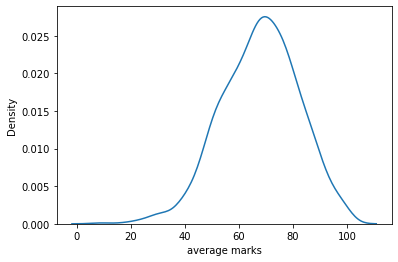

In [51]:
sns.kdeplot(data=data, x="average marks")

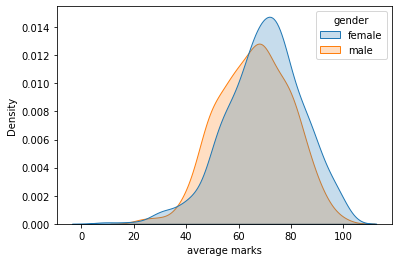

In [52]:
sns.kdeplot(data=data, x="average marks",hue="gender",fill=True)

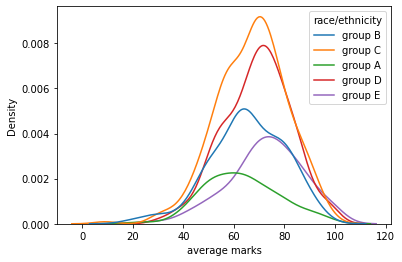

In [53]:
sns.kdeplot(data=data, x="average marks",hue="race/ethnicity")

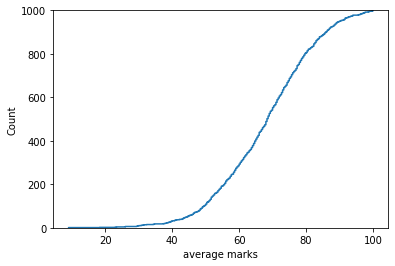

In [54]:
sns.ecdfplot(data=data, x="average marks",stat="count")

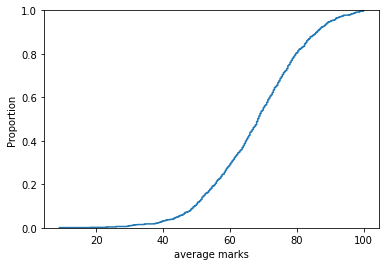

In [55]:
sns.ecdfplot(data=data, x="average marks")

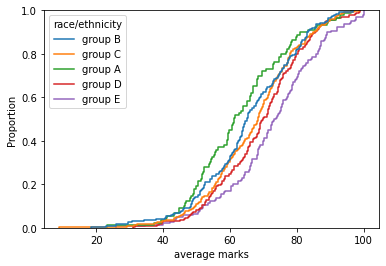

In [56]:
sns.ecdfplot(data=data, x="average marks",hue="race/ethnicity")

# Q-Q plot

0      0.343402
1      1.021416
2      1.746190
3     -1.293183
4      0.600580
         ...   
995    1.839709
996   -0.732068
997   -0.194333
998    0.460301
999    1.068176
Name: average marks, Length: 1000, dtype: float64


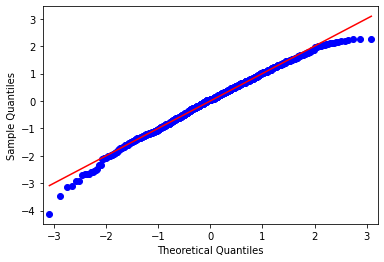

In [58]:
dt=(data["average marks"]-data["average marks"].mean())/data["average marks"].std()
print(dt)
qqplot(dt,line='s')
plt.show()